In [2]:
# Import all necessary libs and inital setup

import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

def show_image(img, is_grayscale):
    if is_grayscale:
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        plt.imshow(img)
    plt.show()

(4000, 6000)


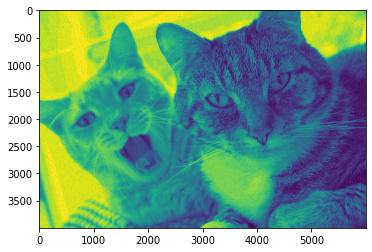

In [3]:
# img = cv2.imread('q3.png', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('q3.png', cv2.COLOR_BGR2RGB)
print(img.shape)

show_image(img, False)

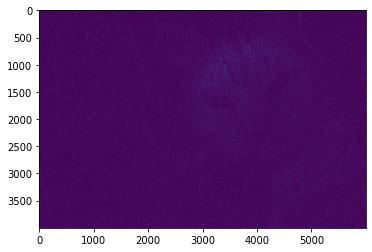

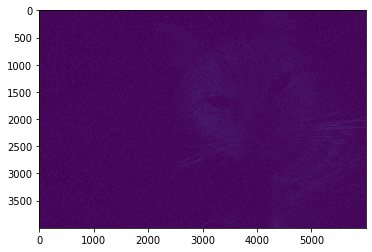

In [4]:
# Create own filter by first initially defining the specified 2D filters. Using
# these we can convulve the Sobel kernels with the provided image.

F_x = np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]])
F_y = np.array([[-1, -2, -1],
                [0, 0, 0],
                [1, 2, 1]])

sbl_x = cv2.filter2D(img, -1, F_x)
sbl_y = cv2.filter2D(img, -1, F_y)

show_image(sbl_x, False)
show_image(sbl_y, False)

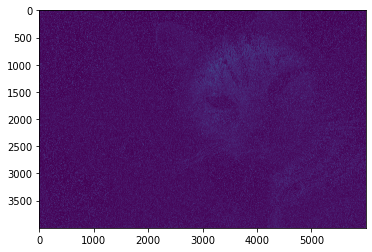

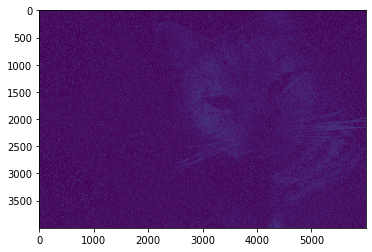

In [5]:
sbl_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
abs_x = np.uint8(np.absolute(sbl_x))
img_x = np.uint8(abs_x)
show_image(img_x, False)

sbl_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
abs_y = np.absolute(sbl_y)
img_y = np.uint8(abs_y)
show_image(img_y, False)

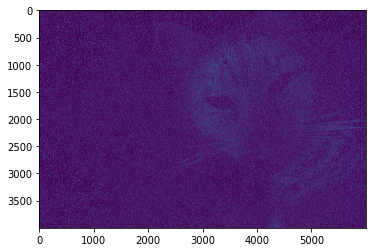

In [6]:
# We can use pythagros to find an approximation of the overall magnitude
# of the gradient.

sbl_grad = np.sqrt(sbl_x**2 + sbl_y**2)
img_grad = cv2.convertScaleAbs(sbl_grad)
show_image(img_grad, False)